## Filtrado Anistrópico 

Índice de los pasos a seguir:
1. Importamos las librerías 
2. Cargamos las imágenes
3. Primera visualización de imágenes 
4. Elección del corte de la imagen
5. Aplicación de ruido a la imagen
6. Aplicación del filtro anisotrópico 
7. Evaluación del filtro anisotrópico con el script de aula virtual 

En esta sección vamos a proceder a añadir ruido a las imágenes que hemos obtenido del repositorio de bases de datos Open Neuro, para poder evaluar los resultados de filtrado que debemos realizar. 

#### 1. Importamos las librerías

En primer lugar, cargaremos las imágenes con las que testearemos nuestro código. Se trata de imágenes de fMRI.

In [1]:
import os
import numpy as np
import nibabel as nib #nos permite leer las imagenes
import matplotlib 
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
import modules
from nilearn import plotting
import funciones

#### 2. Cargamos las imagenes

In [2]:
#img1 = nib.load(r'\Users\Maria\Desktop\data\sub-01\anat\sub-01_T1w.nii.gz')
#img2 = nib.load(r'\Users\Maria\Desktop\data\sub-17\anat\sub-17_T1w.nii.gz')
#img3 = nib.load(r'\Users\Maria\Desktop\data\sub-26\anat\sub-26_T1w.nii.gz')
#img4 = nib.load(r'\Users\Maria\Desktop\data\sub-31\anat\sub-31_T1w.nii.gz')
#img5 = nib.load(r'\Users\Maria\Desktop\data\sub-13\anat\sub-13_T1w.nii.gz')
#img6 = nib.load(r'\Users\Maria\Desktop\data\sub-15\anat\sub-15_T1w.nii.gz')

img1 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-01/anat/sub-01_T1w.nii.gz')
img2 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-02/anat/sub-02_T1w.nii.gz')
img3 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-03/anat/sub-03_T1w.nii.gz')
img4 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-04/anat/sub-04_T1w.nii.gz')
img5 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-05/anat/sub-05_T1w.nii.gz')
img6 = nib.load('/Users/gemaperez/Imagen/bd_schizo/sub-06/anat/sub-06_T1w.nii.gz')

Vamos a estudiar algunas características de los datos que hemos cargado, además de mostrarlos por pantalla.

In [3]:
#para obtener los datos de nuestra imagen
data = img1.get_fdata()

In [4]:
#nos muestra las dimensiones de nuestra imagen
print(data.shape) 

(176, 256, 256)


#### 3. Primera visualización de imagenes

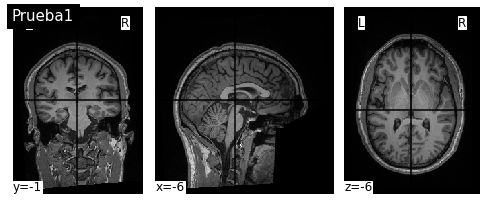

In [5]:
plotting.plot_img(img1, title="Prueba1",display_mode='ortho',cmap=plt.cm.gray )
plotting.show()   

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición.

> En caso de querer disminuir el tiempo de ejecución descomente una de las líneas para disminuír el tamaño de las imágenes y por ende, el número de píxeles a analizar.<pre><code>a = np.array(skimage.transform.resize(img1.dataobj, (50,70)))
a = np.array(skimage.transform.rescale(img.dataobj,0.3))
</code></pre> Y comente la línea:<pre><code>a = np.array(img1.dataobj)
</code></pre>

#### 4. Elección del corte de la imagen

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición.

In [6]:
#Redimensionamos las imágenes

a = np.array(skimage.transform.resize(img1.dataobj, (60,80))) #ahora nuestra imagen es de 50x70x256

#a = np.array(skimage.transform.rescale(img.dataobj,0.3))
a.shape

(60, 80, 256)

Una resonancia obtiene imágenes en 3D por lo que a la hora de analizar el array obtenido debemos tener en cuenta que las tres posiciones que obtenemos corresponden a:

    1. La altura de la imagen
    2. El ancho de la imagen
    3. El número de corte

Para poder analizar las imágenes escogeremos un corte intermedio(128)

Normalizaremos las frecuencias de las imágenes, de forma que el rango de este nuevo histograma sea [0,1] Es decir dividimos cada frecuencia entre el total de píxeles de la imagen.

(Text(0.5, 1.0, 'Imagen original'), (-0.5, 79.5, 59.5, -0.5))

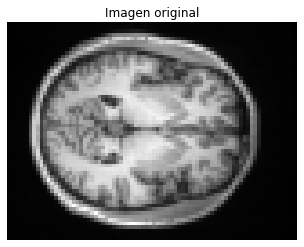

In [10]:
img_gray= a[:,:,128]

#normalizo la imagen
img_o=img_gray
#normalizamos nuestra imagen
img_o=img_o/np.max(img_o) 
#las imagenes se muestran con imshow, con cmap mostramos la escala de grises de la img.
plt.imshow(img_gray, cmap=plt.cm.gray) 
plt.title('Imagen original'), plt.axis('off')

#### 5. Aplicación de ruido a la imagen

Llamando a la función **.add_gnoise()** y la función **.salpimienta** del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen.

Ahora procedemos a aplicar ruido gaussiano a nuestras imágenes. Solicitamos del script *modules.py* la función *add_gnoise* con una intensidad de 0.03.

(Text(0.5, 1.0, 'Ruido sal y pimienta'), (-0.5, 79.5, 59.5, -0.5))

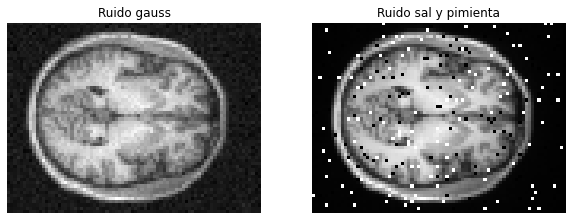

In [11]:
#Aplicar ruido gaussiano con intensidad de 0.03.

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
img_gauss=modules.add_gnoise(img_o,0.03) 
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Ruido gauss'), plt.axis('off')

#Aplicar ruido impulsivo con 0.05 de intensidad
plt.subplot(122)
img_salpimienta=modules.salpimienta(img_o,0.05) 
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Ruido sal y pimienta'), plt.axis('off')

Realizamos el mismo procedimiento, pero esta vez aplicando ruido impulsivo o ruido sal y pimienta a la imagen. Invocamos del script *modules.py* la función *salpimienta* con 0.05 de intensidad.

#### 6. Prodecimiento con varias imagenes

Creamos una función para agilizar el procedimiento anterior con todas las imágenes, **image_prep(img)**, que será la encargada de preparar y normalizar nuestras imágenes.

A continuación obtenemos un conjunto de imágenes ruidosas, de diferentes intensidades, para probar los algoritmos con algunas de ellas:

In [155]:
img_o2 = funciones.image_prep(img2)
img_gauss2=modules.add_gnoise(img_o2,0.03)
img_salpimienta2=modules.salpimienta(img_o2,0.05)

img_o3 =funciones.image_prep(img3)
img_gauss3=modules.add_gnoise(img_o3,0.07)
img_salpimienta3=modules.salpimienta(img_o3,0.1)

img_o4 =funciones.image_prep(img4)
img_gauss4=modules.add_gnoise(img_o4,0.1)
img_salpimienta4=modules.salpimienta(img_o4,0.15)

img_o5 =funciones.image_prep(img5)
img_gauss5=modules.add_gnoise(img_o5,0.15)
img_salpimienta5=modules.salpimienta(img_o5,0.2)

img_o6 =funciones.image_prep(img6)
img_gauss6=modules.add_gnoise(img_o6,0.2)
img_salpimienta6=modules.salpimienta(img_o6,0.25)

#### 6. Aplicamos el filtro anisotrópico

En este apartado vamos a mostrar los resultados de realizar un filtrado anisotrópico en algunas de las imágenes.El filtrado anisotrópico tambien conocido como **filtrado de Perona y Malik**, nos permite suavizar la imagen pero teniendo en cuenta los bordes de la misma. 

En este tipo de filtrado hay que asumir dos condiciones:
   1. **Localización inmediata:** los límites de las regiones deben ser distinguidos y deben coincidir con los originales.
   2. **El suavizado** debe ser mayor dentro de una región que con las regiones vecinas.A diferencia de la difusión isotrópica, este coeficiente varía segun la localización espacial. 

De esta forma, en las zonas con un **gradiente elevado** la difusión (y el suavizado) será **pequeña**, mientras que en las zonas de **gradiente bajo**, la difusión (y por tanto, el suavizado), será **mayor**. En conclusión, en las zonas de los bordes el suavizado será pequeño y en las zonas más homogéneas de la imagen el suavizado será mayor.


En este caso, no implementaremos el algoritmo de Perona y Malik, si no una **aproximación**:

  1. Aplicamos un **filtro derivativo**:
     * Hemos decidido aplicar el filtro derivativo **Sobel**. Los filtros derivativos son capaces de destacar las zonas con un alto contraste local.Estos filtros funcionan mediante el cálculo del gradiente que, en una imagen sería la diferencia de niveles de gris entre dos puntos de esta. Las zonas con un alto contraste local en una imagen son los bordes
        
         Vamos a considerar una versión simplificada del gradiente. La magnitud del gradiente  lo calculamos como:
                        |∇f| = |fx | + |fy |
                        
         Sobel es uno de los filtros derivativos mas utilizados, dando mayor peso a los pixeles centrales que a los diagonales.Calculamos las derivadas horizontales y verticales con submascaras de 3x3 y luego sumamos los resultados para obtener el gradiente. 
         
         Es necesario aplicar *padding* para tener en cuenta todos los bordes de nuestra imagen con ruido.
      
2. Recorremos la imagen con parches de 3x3 (operaciones locales) utilizando un bucle

    * Tenemos en cuenta el numero de iteraciones por lo que con un bucle while realizamos este procedimiento hasta llegar al numero de iteraciones que metemos como parámetro. 
    * Mediante un bucle for, recorremos nuestra imagen y lo almacenamos en un parche de 3x3. 
    * Calculamos el gradiente. 


3. Mediante un bucle if, y un determinado valor de gradiente (un umbral), decidimos aplicar o no un determinado filtro suavizante, en nuestro caso un filtro de media. 
    * Si el valor del gradiente es mayor que el umbral que hemos determinado, eso quiere decir que el algortimo está iterando sobre una zona donde hay un borde y no aplica el filtrado de media. En el caso de que el gradiente sea menor que el umbral, estamos iterando sobre una zona homogénea y por tanto podemos aplicar el filtro de media en ese parche.

Para implementar esta aproximación hemos creado la función **.aniso_filter(img, iteraciones, threshold)** en el archivo modules.py. En esta función tenemos en cuenta tres parámetros:
* img: que hace referencia a la imagen ruidosa que queremos filtrar. 
* iteraciones: se trata del numeros de iteraciones que queremos realizar
* threshold: también denominado umbral, por el que decidimos o no si aplicar el filtro suavizante.

Para programar este filtro debemos tener en cuenta el flujo que vamos a seguir:



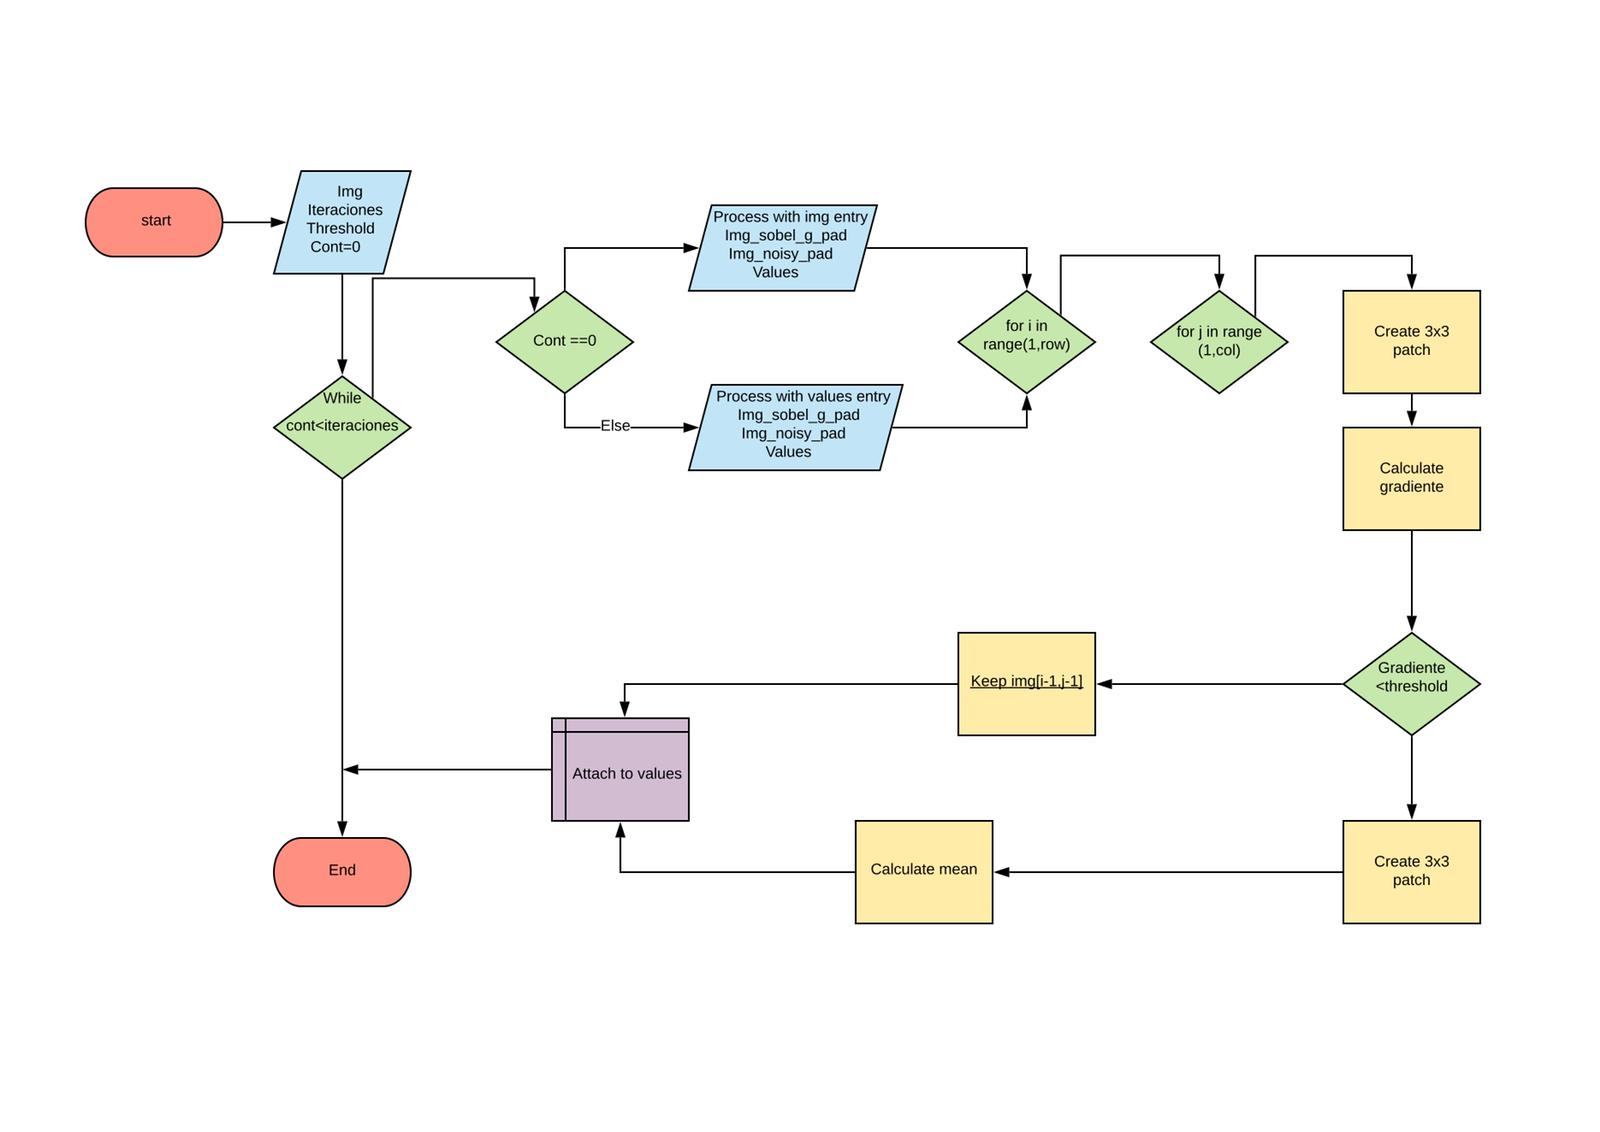

De esta forma importamos la función *aniso_filter* del script *modules.py* y  elegimos un número de iteraciones de 20 y un umbral de 10 con el que ejecutarlo.

In [156]:
#aplicamos el filtro anisotrópico descrito previamente

denoise_img = modules.aniso_filter(img_gauss, 2, 0.8) 

Una vez aplicado el filtro comparamos la imagen con ruido y la filtrada.

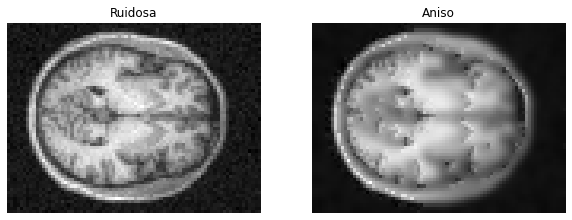

In [157]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Ruidosa'), plt.axis('off')
plt.subplot(122)
plt.title('Aniso'), plt.axis('off')
plt.imshow(denoise_img, cmap=plt.cm.gray)


Comparando ambas imagenes podemos observar que se cumplen las dos condiciones:
   1. **Localización inmediata:** los límites de las regiones se distinguen y coinciden con los originales.
   2. **El suavizado** es mayor dentro de una región que con las regiones vecinas.Y podemos observar que varia con la localización espacial 
   
A mayor número de iteraciones, mayor es el suavizado de nuestra imagen. 


#### 7. Evaluación del filtro anisotrópico con el script de aula virtual 

Una vez aplicado el filtro anisotrópico en el apartado anterior, comparamos su rendimiento con el script facilitado en aula virtual. Para ello primero definimos una función con dicho código:

In [158]:
aniso=modules.anisodiff(img_gauss)

Una vez aplicado el filtro, comparamos la imagen con ruido y la filtrada. 

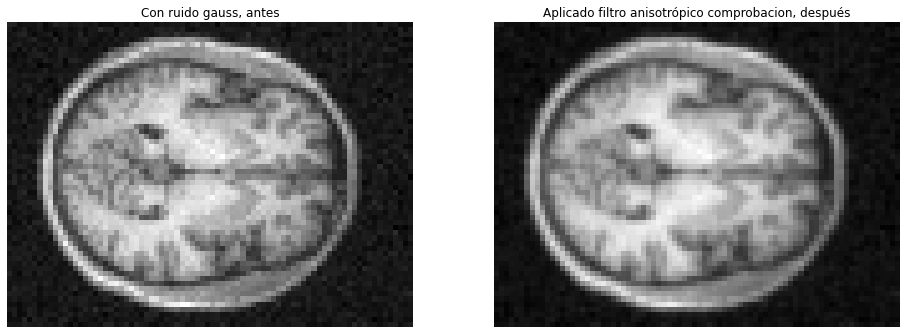

In [159]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado filtro anisotrópico comprobacion, después'), plt.axis('off')
plt.imshow(aniso,cmap=plt.cm.gray)

Como podemos observar en el apartado 6, el rendimiento del filtro anisotrópico nuestro bastante parecido al aplicado en esta sección. Para poder apreciarlo mejor,sería una buena idea cambiar los parámetros de iteración y el umbral, además de agrandar la imagen. 

#### 8. Mismo procedimiento para diferentes imagenes

A continuación vamos a comparar como funciona el filtrado anisotrópico para diferentes imágenes ruidosas en función de el valor de dos parámetros: **iteraciones** y **threshold**.

* **Iteraciones:** este valor nos indica el número de veces que se aplica el procedimiento del filtrado sobre la imagen. 
* **Threshold:** es el valor del gradiente que determina si se va a utilizar o no el filtrado sobre una zona de la imagen. En el caso de que el gradiente sea menor que el valor del threshold, estamos ante una zona homogénea y se va a poder suavizar. Si el valor del gradiente es mayor que el del threshold entonces estamos ante una zona no homogénea y no se va a suavizar. 

Primero evaluaremos el filtrado en imágenes con **ruido gaussiano** y después con **ruido impulsivo**.

### - Para ruido Gauss

        Vamos a seguir el siguiente índice de comparaciones variando las iteraciones y el umbral (threshold):
        
        Para 3 imagenes diferentes: 
         - iteraciones=2, threshold=0.8
         - itereciones=2, threshold=0.95
         - iteraciones=1, threshold=0.99
         - iteraciones=10,threshold=0.1
         - iteraciones=5, threshold=0.1
        
        Para la misma imagen (img_gauss 2):
         - iteraciones=2,     threshold=0.15,0.95,0.5
         - iteraciones=5,     threshold=0.1,0.5,0.9
 
        
        
         

##### Para 3 imagenes diferentes:

Cada imagen tiene un nivel de ruido diferente. Las vamos a presentar de menor a mayor ruido para facilitar la comparación.

#####  - iteraciones=2, threshold=0.8

In [160]:
# lista con las imágenes con ruido a filtrar
list_imgs_gauss = [img_gauss2, img_gauss4, img_gauss6]

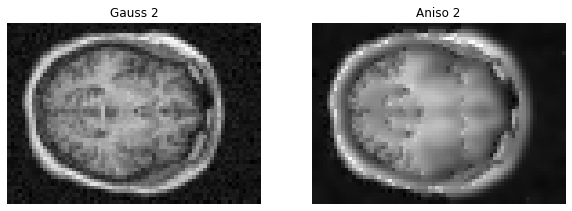

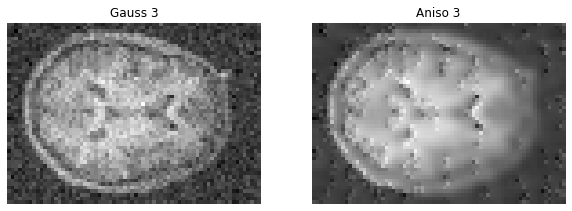

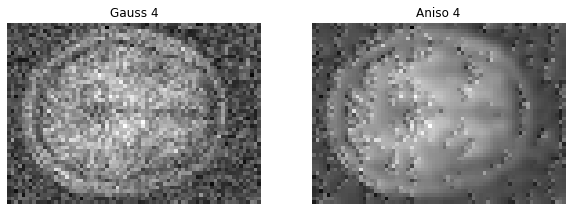

In [161]:
#Aplicamos el filtrado anisotropico para 3 imágenes diferentes con un numero de 
#iteraciones igual a 2, y un threshold igual a 0.8

cont = 2
for i in list_imgs_gauss:
    funciones.comparar_gauss(i,2,0.8,cont) 
    cont=cont+1

En este primer caso de **2 iteraciones threshold igual a 0.8** se puede apreciar un gran suavizado con el filtrado, son imágenes con diferentes intensidades de ruido añadido, por ello en 'Aniso 4' no se aprecia tanta diferencia como en el caso de 'Aniso2'. 

Para mejorar el resultado del filtro en imágenes con más ruido debemos ajustar los parámetros correspondientes. Esto lo analizaremos en apartados posteriores. 


##### - iteraciones=2, threshold=0.95

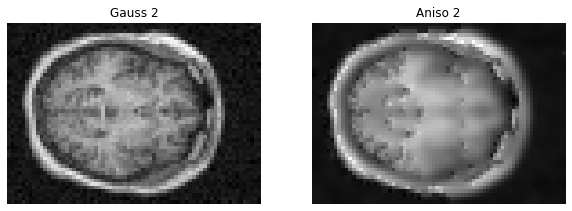

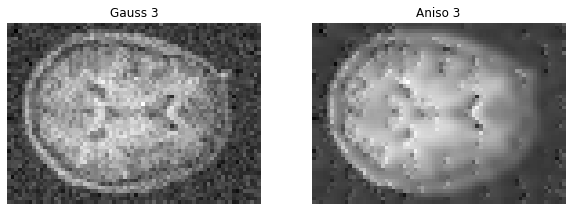

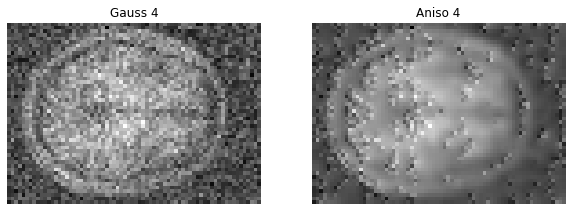

In [162]:
#Aplicamos el filtrado anisotropico para 3 imagenes diferentes con un numero de 
#iteraciones igual a 2, y un threshold igual a 0.95

cont = 2 #empezamos en dos porque hemos llamado a la primera img img_gauss2
for i in list_imgs_gauss:
    funciones.comparar_gauss(i,2,0.95,cont) 
    cont=cont+1

En este primer caso de **2 iteraciones threshold igual a 0.95** se puede apreciar un gran suavizado en el filtrado observando que los bordes matienen su localizacion original, cumpliendo de ese modo con las dos condiciones impuestas por el filtrado anisotrópico. De igual modo que en el caso anterior, 'Aniso 2' muestra una gran mejoría tras la aplicación del filtro. 
En la última imagen al tener mayor ruido y ser por tanto más homogéneo en escala de grises nuestro filtro es incapaz de identificar correctamente zonas no homogéneas. 


##### - iteraciones=1, threshold=0.99

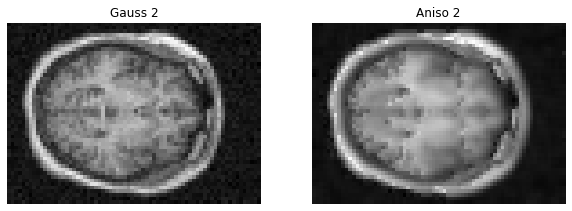

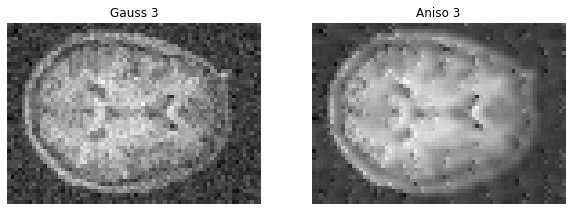

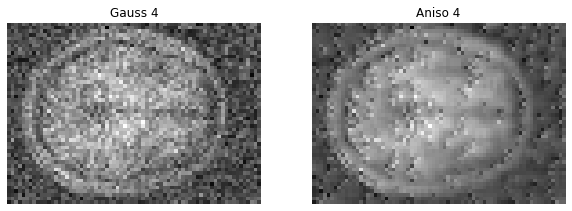

In [163]:
#Aplicamos el filtrado anisotropico para 3 imagenes diferentes con un numero de 
#iteraciones igual a 1, y un threshold igual a 0.99

cont = 2
for i in list_imgs_gauss:
    funciones.comparar_gauss(i,1,0.99,cont) 
    cont=cont+1

Con  **1 iteración y threshold de 0.99** observamos que el ruido se elimina en mayor medida. Sin embargo, con un número de iteraciones igual a uno no llega a iterar sobra nuestra **matriz values**, por lo que no aplica realmente el algoritmo en cuestión.

##### - iteraciones=10, threshold=0.1

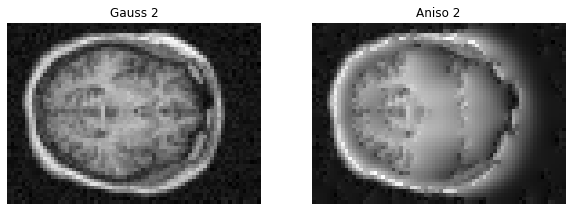

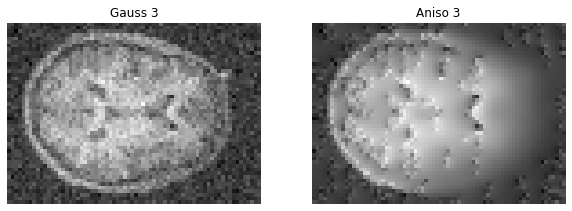

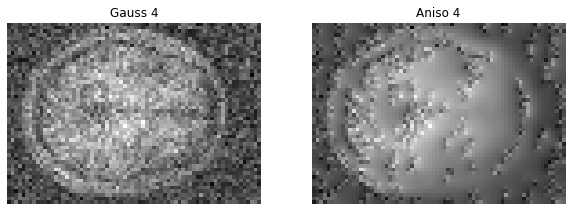

In [164]:
#Aplicamos el filtrado anisotropico para 3 imagenes diferentes con un numero de 
#iteraciones igual a 10, y un threshold igual a 0.1

cont = 2
for i in list_imgs_gauss:
    funciones.comparar_gauss(i,10,0.1,cont) 
    cont=cont+1

Un aumento de iteraciones significa un aumento del suavizado en la imagen. En este caso se traduce en la pérdida de las zonas no homogéneas(bordes), tanto en la imagen menos ruidosa como en la más ruidosa.

##### - iteraciones=5, threshold=0.1

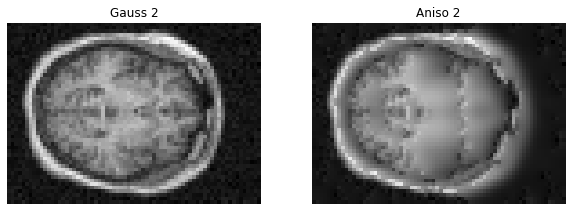

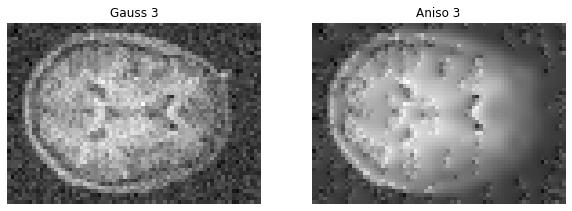

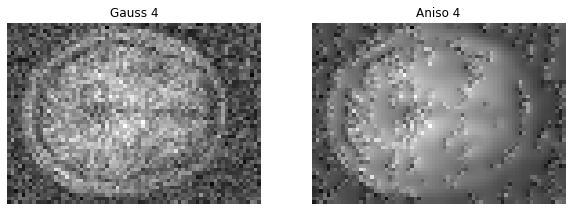

In [165]:
#Aplicamos el filtrado anisotropico para 6 imagenes diferentes con un número de 
#iteraciones igual a 5, y un threshold igual a 0.1

cont = 2
for i in list_imgs_gauss:
    funciones.comparar_gauss(i,5,0.1,cont) 
    cont=cont+1

Con esta comparativa afirmamos que un mayor número de iteraciones manteniendo un mismo threshold implica un mayor suavizado en la imagen a filtrar. Observamos que con un número de iteraciones igual a 5 seguimos perdiendo detalle en nuestras imágenes, aunque en menor medida que en el caso de 10. 

##### Para la misma imagen (img_gauss2):

##### -iteraciones=2,     threshold=0.15,0.95,0.5

In [221]:
denoise_img2_t1 = modules.aniso_filter(img_gauss2, 2, 0.15) 
denoise_img2_t2= modules.aniso_filter(img_gauss2, 2, 0.5) 
denoise_img2_t3= modules.aniso_filter(img_gauss2, 2, 0.95) 

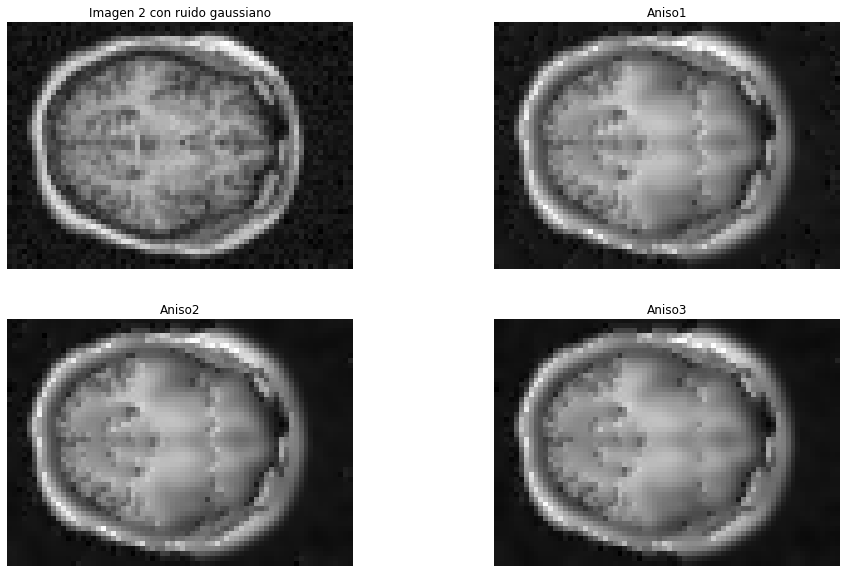

In [222]:
fig = plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('Imagen 2 con ruido gaussiano'), plt.axis('off')
plt.imshow(img_gauss2,cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Aniso1'), plt.axis('off')
plt.imshow(denoise_img2_t1, cmap=plt.cm.gray)
plt.subplot(223)
plt.title('Aniso2'), plt.axis('off')
plt.imshow(denoise_img2_t2,cmap=plt.cm.gray)
plt.subplot(224)
plt.title('Aniso3'), plt.axis('off')
plt.imshow(denoise_img2_t3,cmap=plt.cm.gray)

Manteniendo un número de iteraciones constante igual a 2, y variando el umbral con valores 0.15,0.5 y 0.95. Observamos que aunque a priori no parezca que hay gran diferencia entre las imágenes, podemos ver que en el fondo de la imagen el ruido gaussiano se ha visto disminuido de manera significativa al aumentar el umbral.

##### -iteraciones=5,     threshold=0.15,0.5,0.95

In [203]:
denoise_img2_t1 = modules.aniso_filter(img_gauss2, 5, 0.15) 
denoise_img2_t2= modules.aniso_filter(img_gauss2, 5, 0.5) 
denoise_img2_t3= modules.aniso_filter(img_gauss2, 5, 0.95) 

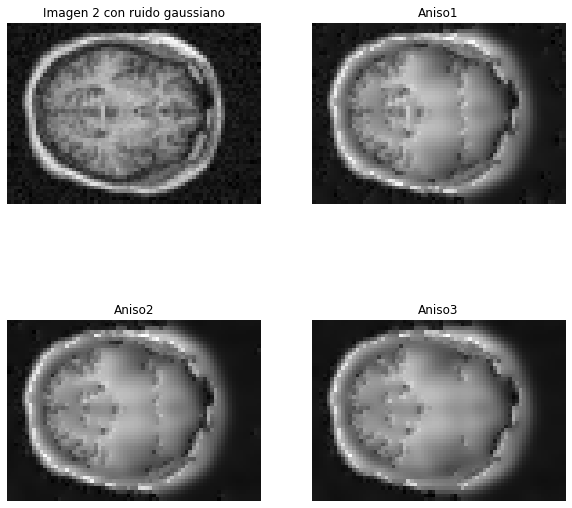

In [204]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Imagen 2 con ruido gaussiano'), plt.axis('off')
plt.imshow(img_gauss2,cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Aniso1'), plt.axis('off')
plt.imshow(denoise_img2_t1, cmap=plt.cm.gray)
plt.subplot(223)
plt.title('Aniso2'), plt.axis('off')
plt.imshow(denoise_img2_t2,cmap=plt.cm.gray)
plt.subplot(224)
plt.title('Aniso3'), plt.axis('off')
plt.imshow(denoise_img2_t3,cmap=plt.cm.gray)

Con un número de iteraciones igual a 5 se produce un suavizado excesivo de las imágenes en comparación al anterior.


**Conclusiones de las comparaciones de imágenes gauss**

Tras analizar las imágenes con diferentes intensidades de ruido, de número de iteraciones y de threshold llegamos a la conclusión de que con una intensidad de ruido bajo/medio, el valor óptimo de párametros sería:

    - iteraciones= 2
    - threshold= 0.95 (permite eliminar el ruido gaussiano de las zonas homogéneas sin perder la información de las zonas no homogéneas)

El filtro anisotrópico en rasgos generales con altas intesidades de ruido no es efectivo porque no consigue distinguir realmente la localización de las zonas no homogéneas. 



### - Para sal y pimienta

        Vamos a seguir el siguiente indice de comparaciones variando las iteraciones y el umbral (threshold):
        
        Para 6 imagenes diferentes: 
         - iteraciones=2, threshold=0.8
         - itereciones=2, threshold=0.95
         - iteraciones=1, threshold=0.99
         - iteraciones=10,threshold=0.1
         - iteraciones=5, threshold=0.1
        
        Para la misma imagen (img_salpimienta2):
         - iteraciones=2,     threshold=0.15,0.5,0.95
         - iteraciones=5,     threshold=0.15,0.5,0.95
         - iteraciones=1,3,5; threshold=0.9

##### Para 3 imagenes diferentes:

Cada imagen tiene un nivel de ruido diferente. Las vamos a presentar de menor a mayor ruido para facilitar la comparación.

#####  - iteraciones=2, threshold=0.8

In [205]:
#lista con las imágenes de ruido impulsivo que vamos a filtrar
list_imgs_salt = [img_salpimienta2, img_salpimienta4, img_salpimienta6]

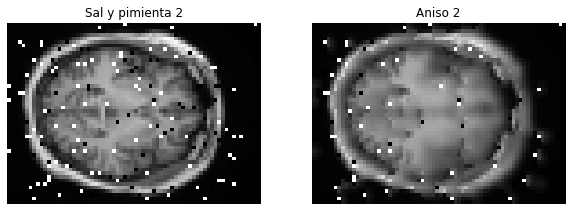

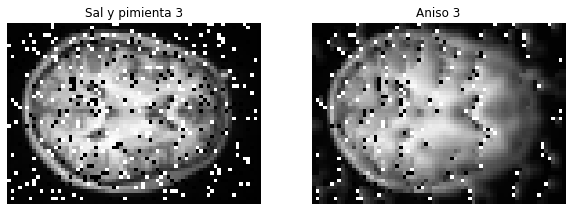

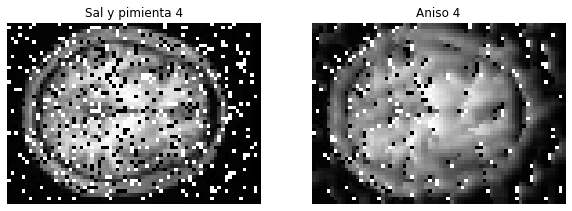

In [206]:
cont = 2
for i in list_imgs_salt:
    funciones.comparar_salpimienta(i,2,0.8,cont)
    cont=cont+1

En este primer caso de **2 iteraciones threshold igual a 0.8** se puede apreciar un gran suavizado en el filtrado y no es capaz de deshacerse de todo el ruido impulsivo. Pero sí se ve como varios píxeles de sal y pimienta desaparecen, sobretodo en la imagen de 'Aniso 2'. Aunque se nota algo de mejoría, cuanto más ruidosa es la imagen más le cuesta quitar el ruido como se puede ver en la imagen de 'Aniso 6'. 


#####  - iteraciones=2, threshold=0.95

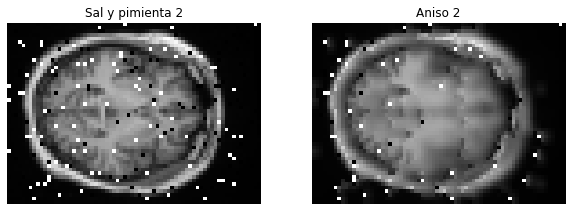

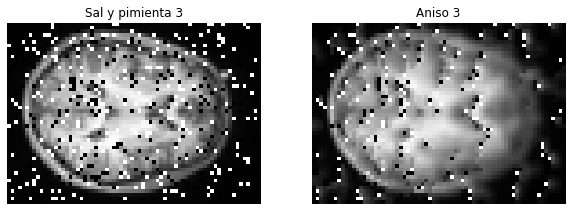

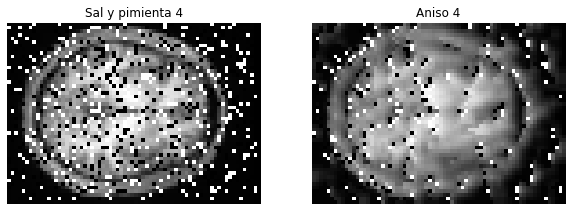

In [207]:
# Ahora con 2 iteraciones y threshold de 0.95

cont = 2
for i in list_imgs_salt:
    funciones.comparar_salpimienta(i,2,0.95,cont)
    cont=cont+1

En este caso con **2 iteraciones threshold igual a 0.95** vemos resultados muy parecidos a los anteriores. 

La primera imagen filtrada , 'Aniso 2', da bastante buen resultado a la hora de deshacerse del ruido impulsivo, aunque no logramos distinguir si es mejor que el caso anterior puesto que es un cambio leve. Esto se debe a que los píxeles del ruido, tanto los blancos como los negros, son muy específicos y pese a que visualmente se ven fácilmente no son tan sencillos de eliminar.

#####  - iteraciones=1, threshold=0.99

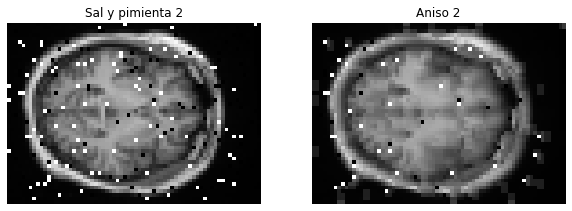

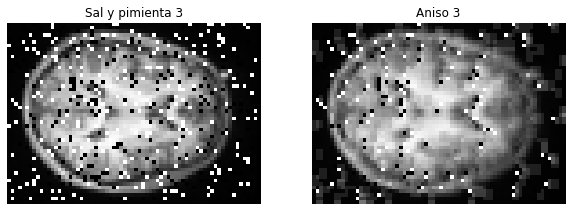

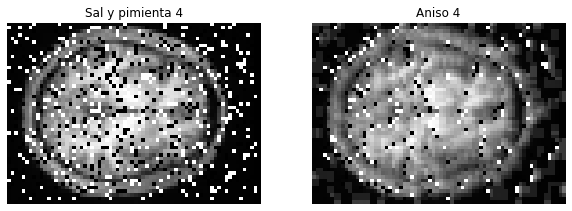

In [208]:
# Ahora con 1 iteraciones y threshold de 0.99

cont = 2
for i in list_imgs_salt:
    funciones.comparar_salpimienta(i,1,0.99,cont)
    cont=cont+1

Con  **1 iteración y threshold de 0.99** se ve poco suavizado respecto a los casos anteriores al disminuir el número de iteraciones. Como hemos mencionado con anterioridad esto se debe a que no iteramos nunca con la **matriz values**. 

#####  - iteraciones=10, threshold=0.1

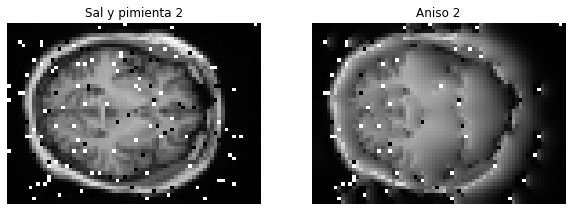

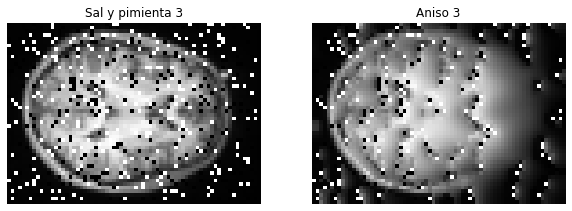

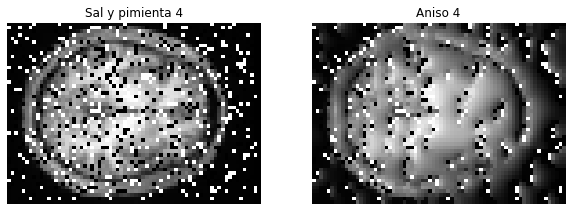

In [209]:
# Ahora con 10 iteraciones y threshold de 0.1

cont = 2
for i in list_imgs_salt:
    funciones.comparar_salpimienta(i,10,0.1,cont)
    cont=cont+1

El aumento de iteraciones significa un aumento del suavizado en la imagen. En este caso se traduce en la pérdida de contraste en zonas importantes de la imagen, tanto en la menos ruidosa como en la más ruidosa. Como vemos en este ejemplo, un exceso en iteraciones degenera completamente la imagen por lo que pierde su sentido clínico. 

#####  - iteraciones=5, threshold=0.1

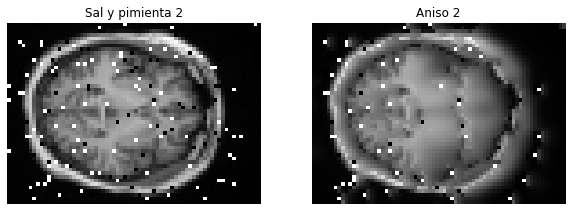

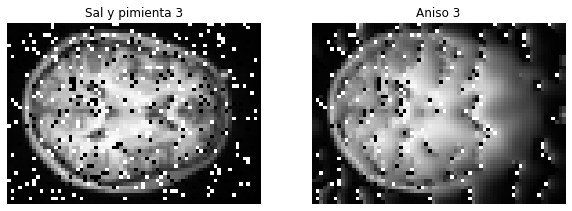

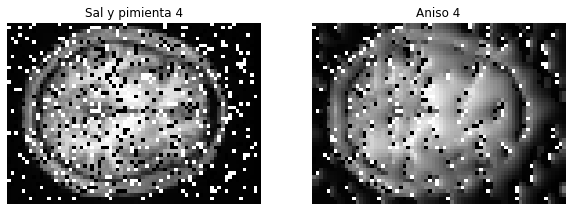

In [210]:
# Ahora con 5 iteraciones y threshold de 0.1

cont = 2
for i in list_imgs_salt:
    funciones.comparar_salpimienta(i,5,0.1,cont)
    cont=cont+1

Reduciendo las iteraciones a 5 en vez de 10 pensamos que el suavizado no sería tan pronunciado como en el caso anterior, pero lo sigue siendo. Además los píxeles de sal y pimienta que conseguimos quitar no sirven si la imagen pierde detalle (como ocurre en 'Aniso 2' ). 

Nótese que 'Aniso 3' pese a tener menos cantidad de ruido que 'Aniso 4' presenta una menor definición en los bordes.Esto se debe a que si nos fijamos en el borde frontal de 'Img_salpimienta3' la escala de grises es más homogénea, por lo que aplica en toda esa zona el filtro de media. 

##### Para la misma imagen (img_salpimienta2):


##### - iteraciones=2,     threshold=0.15,0.95,0.5

In [213]:
denoise_img2_t1 = modules.aniso_filter(img_salpimienta2, 2, 0.15) 
denoise_img2_t2= modules.aniso_filter(img_salpimienta2, 2, 0.5) 
denoise_img2_t3= modules.aniso_filter(img_salpimienta2, 2, 0.95) 

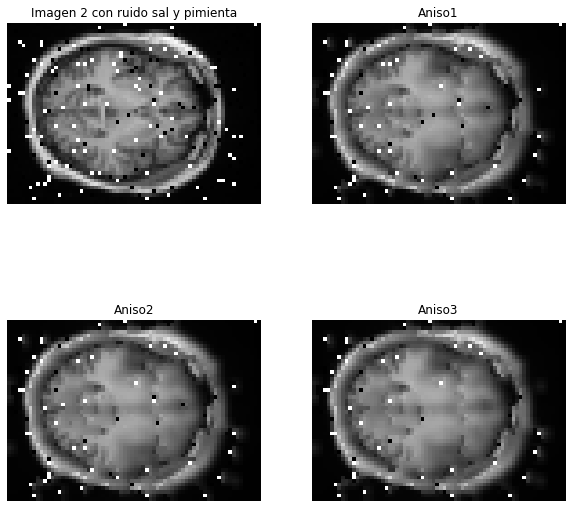

In [215]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Imagen 2 con ruido sal y pimienta'), plt.axis('off')
plt.imshow(img_salpimienta2,cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Aniso1'), plt.axis('off')
plt.imshow(denoise_img2_t1, cmap=plt.cm.gray)
plt.subplot(223)
plt.title('Aniso2'), plt.axis('off')
plt.imshow(denoise_img2_t2,cmap=plt.cm.gray)
plt.subplot(224)
plt.title('Aniso3'), plt.axis('off')
plt.imshow(denoise_img2_t3,cmap=plt.cm.gray)

Podemos observar que la imagen con menor ruido impulsivo es 'Aniso 3' al mayor valor de umbral.

##### -iteraciones=5,     threshold=0.1,0.5,0.9

In [211]:
#Utilizamos la imagen sal_pimienta2

denoise_img2_t1 = modules.aniso_filter(img_salpimienta2, 5, 0.15) 
denoise_img2_t2= modules.aniso_filter(img_salpimienta2, 5, 0.5) 
denoise_img2_t3= modules.aniso_filter(img_salpimienta2, 5,0.95) 

Aplicamos el filtrado aniso para la imagen 2, con un numero de iteraciones igual a 5, y con un umbral de 0.1,0.5 y 0.9 respectivamamente.

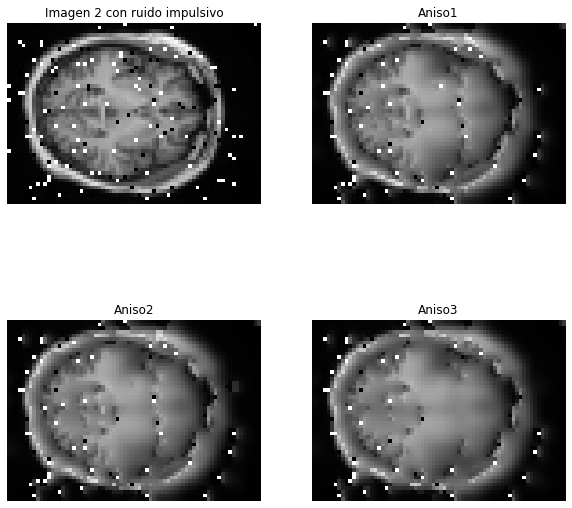

In [212]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Imagen 2 con ruido impulsivo'), plt.axis('off')
plt.imshow(img_salpimienta2,cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Aniso1'), plt.axis('off')
plt.imshow(denoise_img2_t1, cmap=plt.cm.gray) #0.1
plt.subplot(223)
plt.title('Aniso2'), plt.axis('off')
plt.imshow(denoise_img2_t2,cmap=plt.cm.gray) #0.5
plt.subplot(224)
plt.title('Aniso3'), plt.axis('off')
plt.imshow(denoise_img2_t3,cmap=plt.cm.gray) #0.9

Las imágenes con un umbral más alto, como la 'Aniso 3' eliminan bastante ruido impulsivo comparado con la imagen de umbral 0.1. No vemos mucha diferencia entre 'Aniso 2' y 'Aniso 3', solo que hay ciertos píxeles blancos de los que el filtro con un umbral mayor sí ha sido capaz de deshacerse, pero la disimilitud es leve.  

##### -iteraciones=1,3,5; threshold=0.9

In [216]:
denoise_img2_t1 = modules.aniso_filter(img_salpimienta2, 1, 0.9) 
denoise_img2_t2 = modules.aniso_filter(img_salpimienta2, 2, 0.9) 
denoise_img2_t3= modules.aniso_filter(img_salpimienta2, 5, 0.9) 

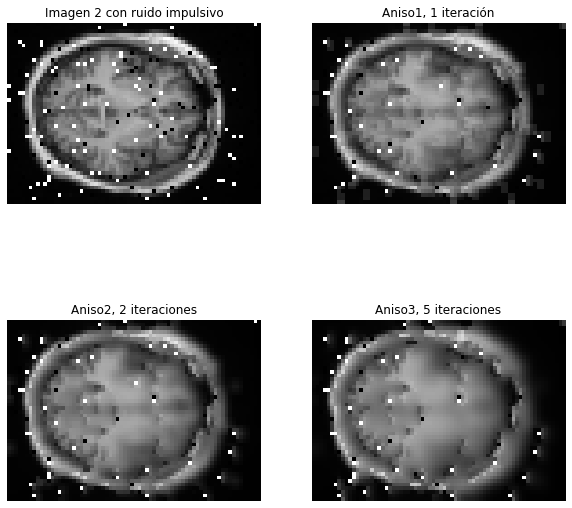

In [218]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Imagen 2 con ruido impulsivo'), plt.axis('off')
plt.imshow(img_salpimienta2,cmap=plt.cm.gray)
plt.subplot(222)
plt.title('Aniso1, 1 iteración'), plt.axis('off')
plt.imshow(denoise_img2_t1, cmap=plt.cm.gray)
plt.subplot(223)
plt.title('Aniso2, 2 iteraciones'), plt.axis('off')
plt.imshow(denoise_img2_t2,cmap=plt.cm.gray)
plt.subplot(224)
plt.title('Aniso3, 5 iteraciones'), plt.axis('off')
plt.imshow(denoise_img2_t3,cmap=plt.cm.gray)

Vemos que cuantas más iteraciones más suavizada está la imagen. Con este umbral, la iteración que mejor funciona es la de 1, porque consigue deshacerse de la mayor parte del ruido impulsivo y no pierde la definición de las estructuras anatómicas.

#####  Conclusiones de las comparaciones de sal y pimienta
 

En general para el ruido de sal y pimienta, el filtrado anisotrópico es capaz de eliminarlo con un bajo número de iteraciones, no más de 5. El inconveniente es que cuanto más iteraciones apliquemos, más se suaviza la imagen y por tanto se pierden estructuras anatómicas de interés. Una manera de solucionar esto es encontrando un valor de threshold adecuado que ayude a la hora de discernir zona homogéneas de no homogéneas. 

Hemos comprobado que para imágenes de poco ruido o ruido medio un valor igual a 2 iteraciones y un threshold alto entre 0.9 y 0.95 dan resultados satisfactorios, dado que se elimina gran parte del ruido pero se conserva la información relevante para el estudio clínico. 

Cuando el threshold es muy bajo o el número de iteraciones es demasiado alto, el ruido no se elimina bien, independientemente de si es una imagen con mucho o poco ruido. Esto se ve muy bien en la sección donde comparamos las imágenes con 10 iteraciones y 0.1 de threshold. 

Cuanto más ruidosa sea una imagen, más dificil va a ser eliminar ese ruido. Además los píxeles del ruido impulsivo, tanto los blancos como los negros, son muy específicos y pese a que visualmente se ven fácilmente no son tan sencillos de eliminar del todo. Por ello es importante a la hora de aplicar el filtrado llegar a un compromiso entre el valor de threshold y el número de iteraciones para no perder información importante de la imagen. 